In [87]:
from sympy import symbols, init_printing, Matrix, exp, diff, Function, Equality, I, simplify, re, im
init_printing()

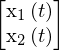

In [34]:
N = 2
t = symbols("t", real=True)
x = Matrix([Function("x_"+str(i+1))(t) for i in range(N)])
x

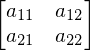

In [35]:
A = Matrix(symbols("a1:"+str(N+1)+"(1:"+str(N+1)+")")).reshape(N, N)
A

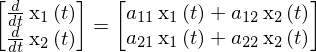

In [42]:
eq = Equality(diff(x, t), A*x)
eq

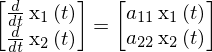

In [47]:
ss_diag = {A[1, 0]: 0, A[0, 1]: 0}
A_diag = A.subs(ss_diag)
eq_diag = eq.subs(ss_diag)
eq_diag

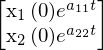

In [49]:
x_sol_diag = exp(A_diag*t)*x.subs(t, 0)
ss_sol_diag = {x[i]: x_sol_diag[i] for i in range(N)}
x_sol_diag

In [52]:
eq_diag.subs(ss_sol_diag).doit()

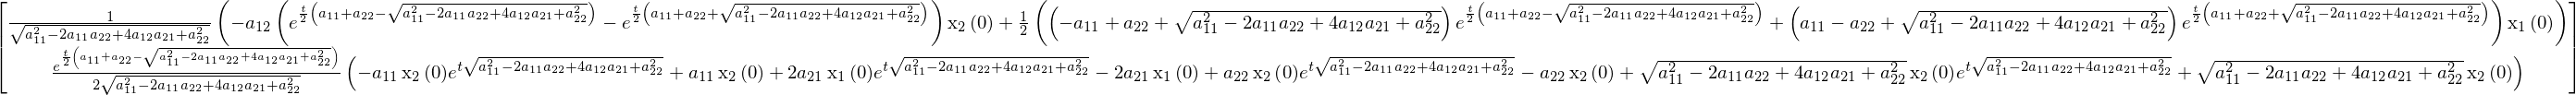

In [56]:
x_sol = exp(A*t)*x.subs(t, 0)
x_sol = simplify(x_sol)
ss_sol = {x[i]: x_sol[i] for i in range(N)}
x_sol

In [65]:
eq_ = eq.subs(ss_sol).doit().expand()
eq_

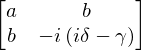

In [143]:
gamma, delta = symbols("gamma, delta", positive=True)
a, b, c = symbols("a, b, c", real=True)
ss_full = {A[0, 0]: I*a, A[1, 0]: I*b, A[0, 1]: I*b, A[1, 1]: -gamma+I*delta}
A_full = A.subs(ss_full)/I
A_full

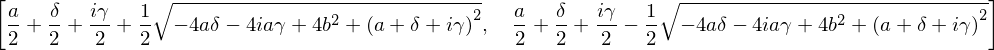

In [144]:
lam = A_full.eigenvals().keys()
lam

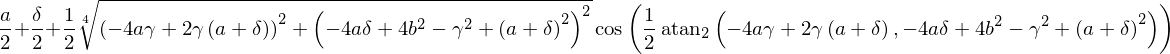

In [153]:
re(lam[0])#.subs({gamma: 0})

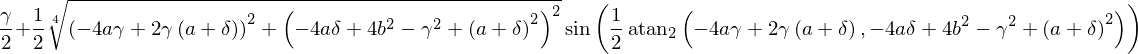

In [146]:
im(lam[0])

In [154]:
x_full = simplify(exp(-I*A_full*t)*x.subs(t, 0))

In [155]:
eqq = diff(x_full, t)+I*A_full*x_full
eqq = eqq.expand()
eqq

In [135]:
eqq[0].factor()

In [112]:
norm = x_full.norm()

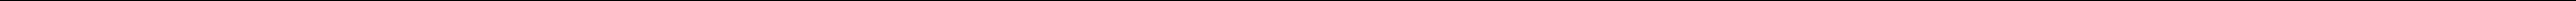

In [113]:
norm.args[0].factor()